### Import packages

In [1]:
import os
import pandas as pd
import numpy as np

from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet

### Import data and data preprocessing

In [2]:
path = '/Users/ryan/Desktop/quantchina/quant-examples/研报复现/data'
file_name = 'data1.csv'
input_file = os.path.join(path, file_name)
df = pd.read_csv(input_file)
df.head()

,code,short_name,STK_MKT_DALYR-TradingDate,STK_MKT_DALYR-Turnover,TRD_Dalyr-Trddt,TRD_Dalyr-Opnprc,TRD_Dalyr-Clsprc,TRD_Dalyr-Dsmvosd
0,1,平安银行,2019/7/15,0.00490,2019/7/15,14.03,14.00,240383441.9
1,1,平安银行,2019/7/16,0.00421,2019/7/16,13.97,13.75,236090880.4
2,1,平安银行,2019/7/17,0.00239,2019/7/17,13.70,13.69,235060665.7
3,1,平安银行,2019/7/18,0.00246,2019/7/18,13.65,13.67,234717260.7
4,1,平安银行,2019/7/19,0.00505,2019/7/19,13.74,13.99,240211739.4


In [3]:
# Make 'Date' readable to pd.to_datetime() function
df['Date'] = df['STK_MKT_DALYR-TradingDate'].str.split('/').apply(lambda x: x[0]+'-'+x[1]+'-'+x[2])
df['Month'] = df['Date'].str[:6]
df['Date'] = pd.to_datetime(df['Date'])

# Drop redundant date columns
df.drop(columns=['STK_MKT_DALYR-TradingDate','TRD_Dalyr-Trddt'], axis=1, inplace=True)

### Calculate factor

In [4]:
# Calculate factor values
df_str = pd.DataFrame(df[['code', 'Month', 'STK_MKT_DALYR-Turnover']].groupby(['code', 'Month']).apply(lambda x: np.std(x)))

df_str.rename(columns={'STK_MKT_DALYR-Turnover':"str_factor"}, inplace=True)
df_str.drop(columns='code', axis=1, inplace=True)

In [5]:
# Merge factor values and the main dataframe
df = pd.merge(df, df_str, on=['Month', 'code'], how='left')
df.head()

,code,short_name,STK_MKT_DALYR-Turnover,TRD_Dalyr-Opnprc,TRD_Dalyr-Clsprc,TRD_Dalyr-Dsmvosd,Date,Month,str_factor
0,1,平安银行,0.00490,14.03,14.00,240383441.9,2019-07-15,2019-7,0.001071
1,1,平安银行,0.00421,13.97,13.75,236090880.4,2019-07-16,2019-7,0.001071
2,1,平安银行,0.00239,13.70,13.69,235060665.7,2019-07-17,2019-7,0.001071
3,1,平安银行,0.00246,13.65,13.67,234717260.7,2019-07-18,2019-7,0.001071
4,1,平安银行,0.00505,13.74,13.99,240211739.4,2019-07-19,2019-7,0.001071


### Backtest

In [6]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [7]:
factor = df.set_index([df.index, df['code']], drop=True)

In [8]:
close = df.pivot_table(index='Date', columns='code', values='TRD_Dalyr-Clsprc')

Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.000000,0.002849,0.001081,0.000612,41356,20.121049
2,0.000842,0.004714,0.002417,0.000777,40949,19.923031
3,0.001620,0.007303,0.004033,0.001258,41024,19.959520
4,0.003061,0.014364,0.007042,0.002372,40949,19.923031
5,0.004872,0.246034,0.019809,0.019659,41258,20.073369


Returns Analysis


,1D,5D,10D
Ann. alpha,0.416,0.348,0.252
beta,1.204,1.261,1.279
Mean Period Wise Return Top Quantile (bps),25.093,24.341,22.640
Mean Period Wise Return Bottom Quantile (bps),-2.191,-1.224,-0.726
Mean Period Wise Spread (bps),27.284,24.447,22.178


<Figure size 432x288 with 0 Axes>

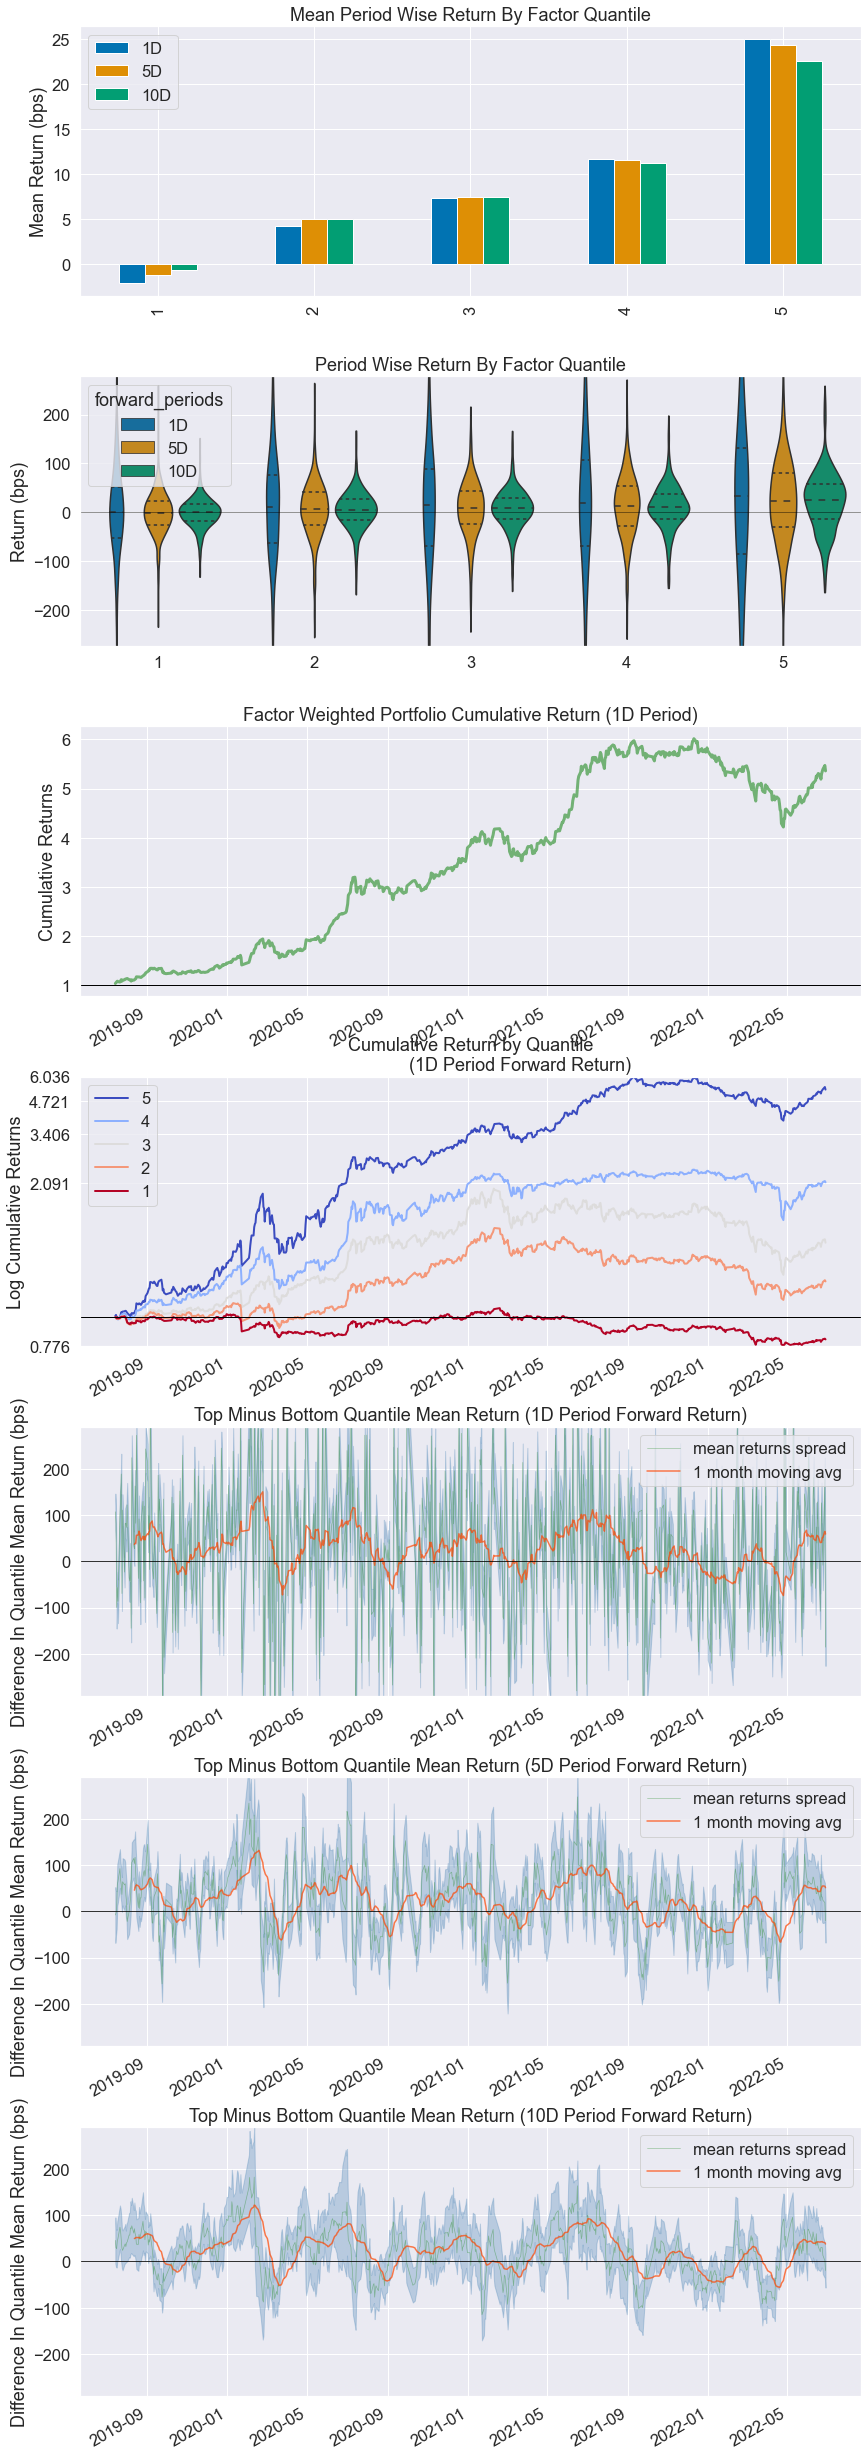

Information Analysis


,1D,5D,10D
IC Mean,0.008,0.038,0.056
IC Std.,0.204,0.207,0.212
Risk-Adjusted IC,0.037,0.182,0.265
t-stat(IC),1.001,4.863,7.098
p-value(IC),0.317,0.000,0.000
IC Skew,0.046,-0.102,-0.213
IC Kurtosis,-0.425,-0.792,-0.721


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

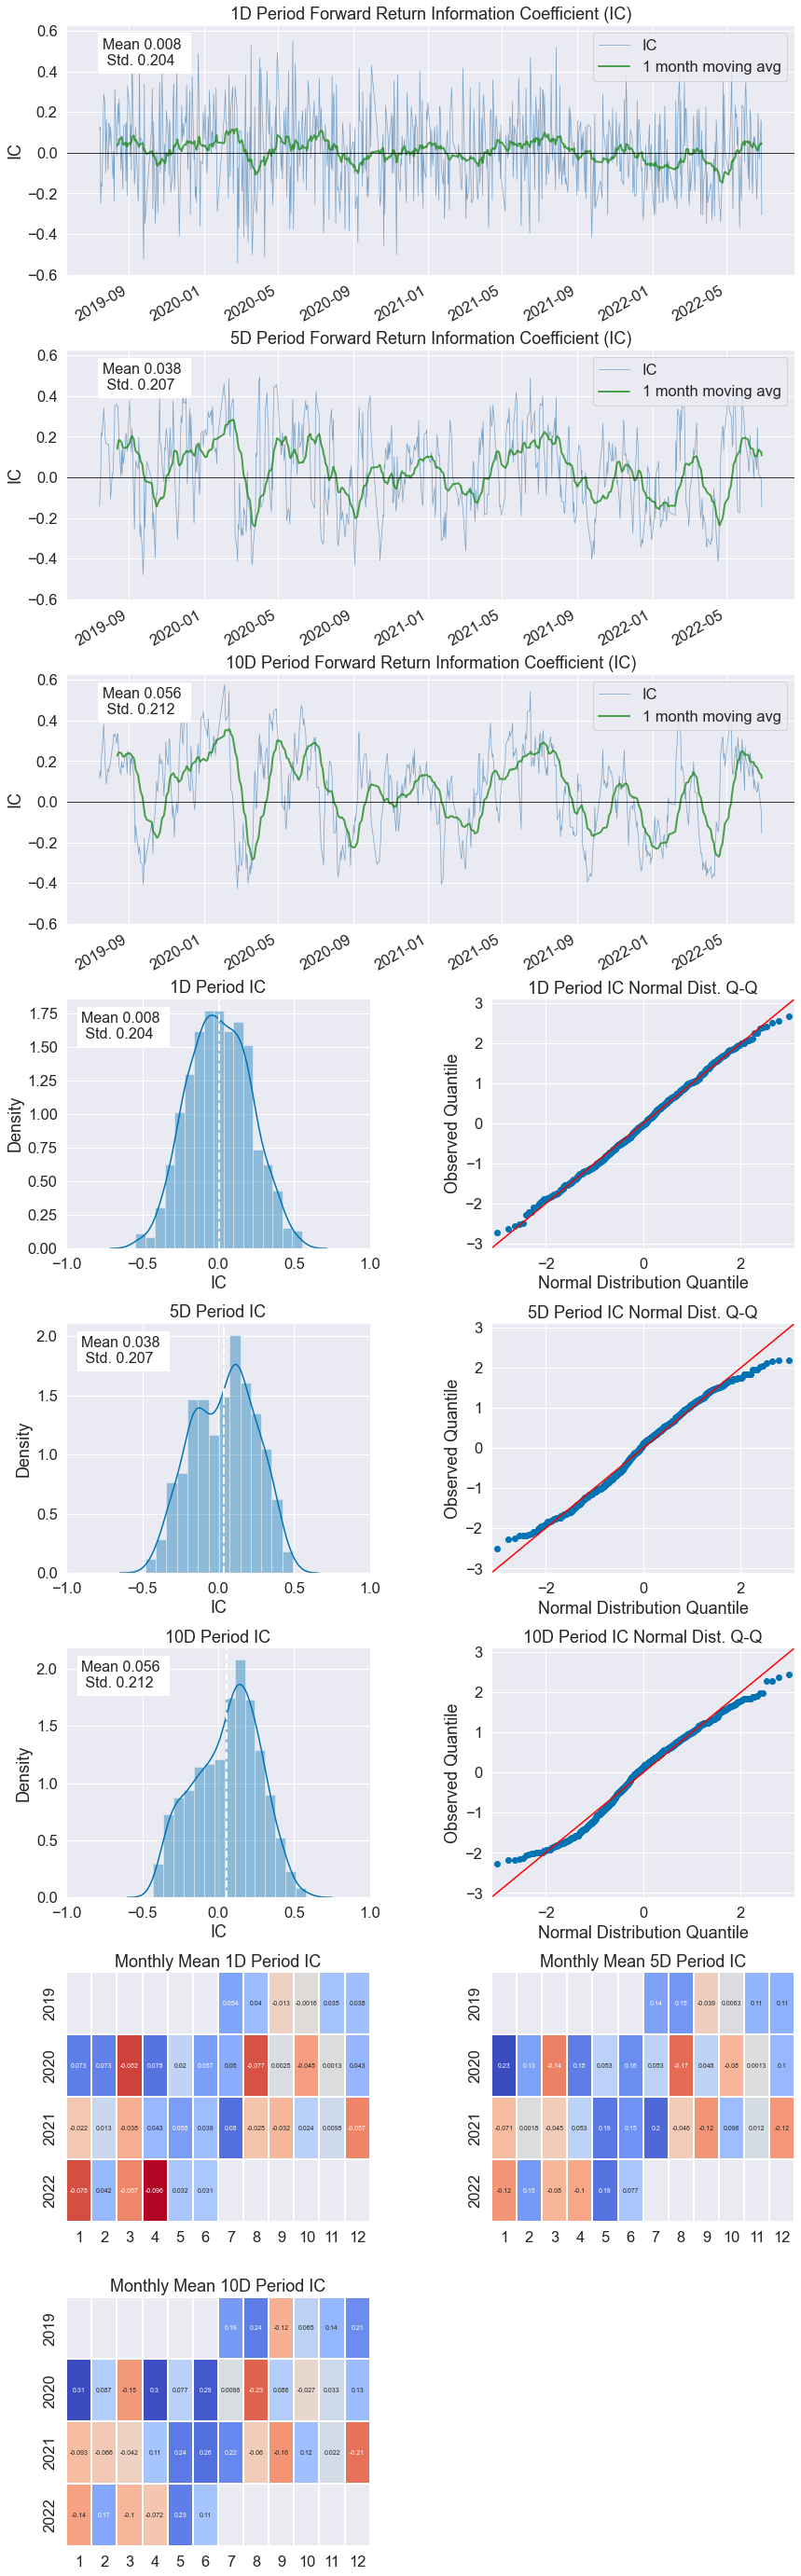

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/alphalens/utils.py:910: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.013,0.063,0.126
Quantile 2 Mean Turnover,0.025,0.124,0.247
Quantile 3 Mean Turnover,0.029,0.138,0.274
Quantile 4 Mean Turnover,0.027,0.132,0.261
Quantile 5 Mean Turnover,0.016,0.076,0.150


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.992,0.96,0.92


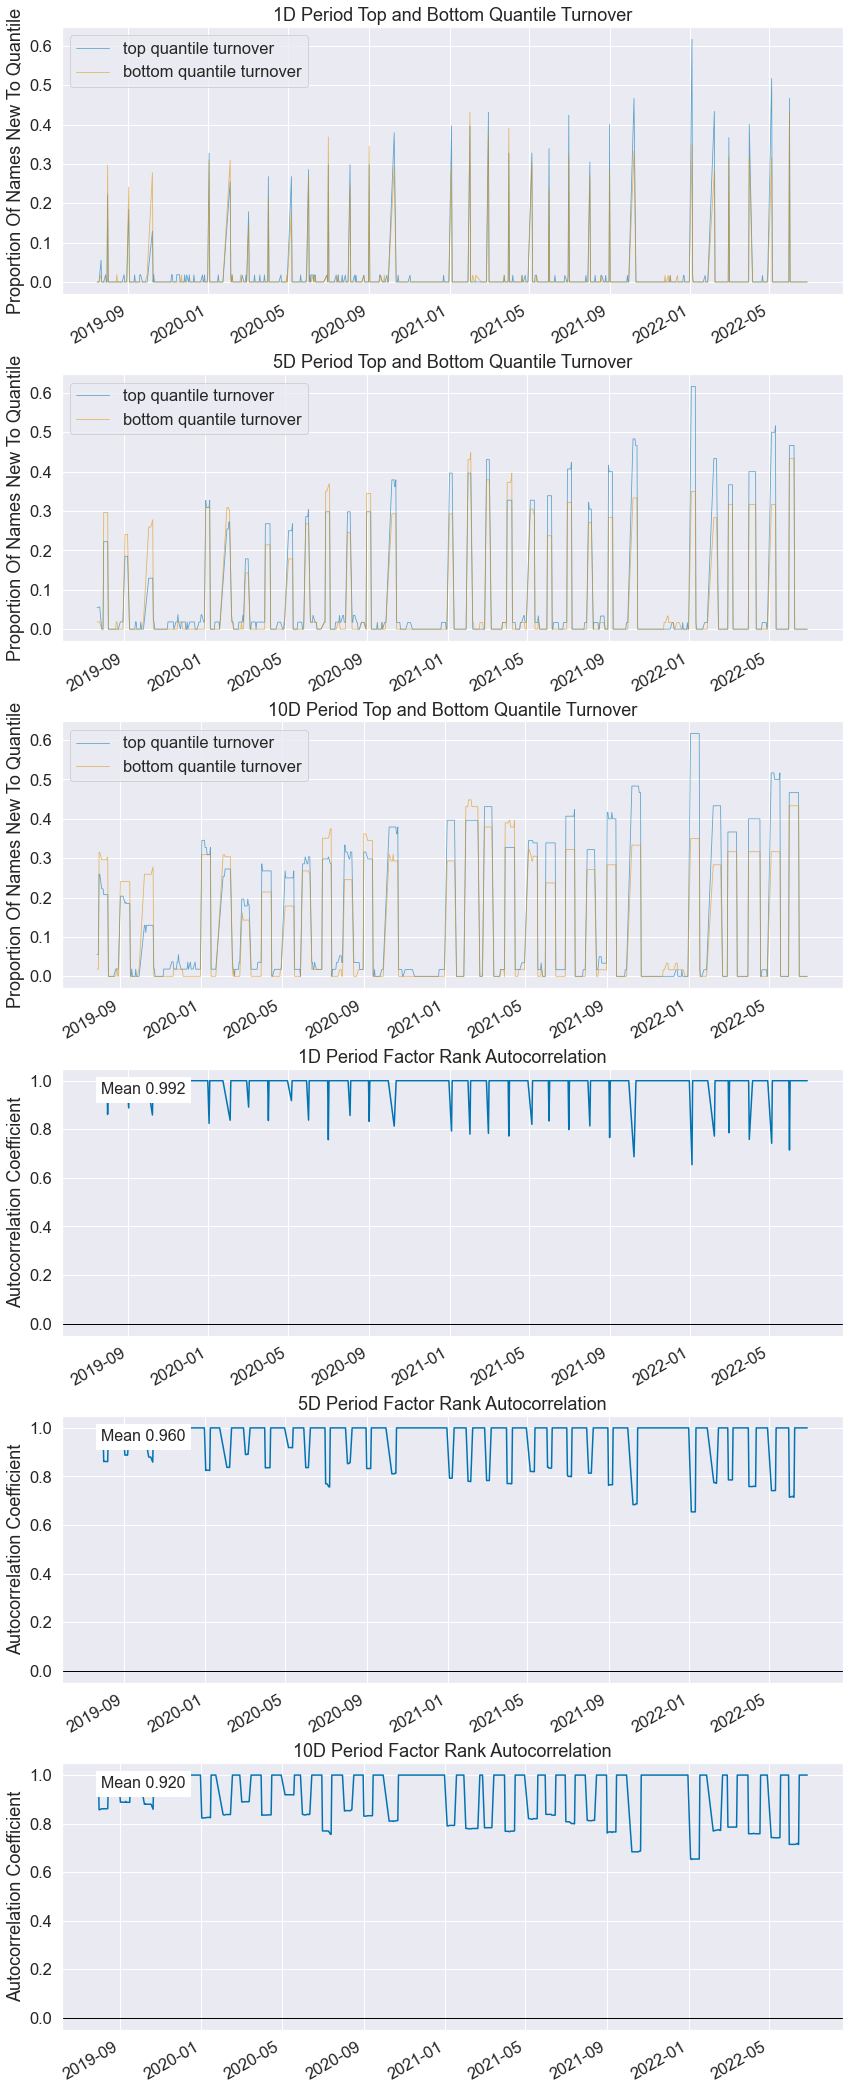

In [9]:
# Generate report by alphalens
ret = get_clean_factor_and_forward_returns(factor[['str_factor']], close)
create_full_tear_sheet(ret, long_short=False)